# 02. Exploratory Data Analysis (EDA) & KPIs

---

## 1. Introduction

The objective of this notebook is to perform a deep exploratory data analysis (EDA) on the cleaned and enriched dataset. We will investigate our initial business questions, calculate key performance indicators (KPIs), and create visualizations to uncover patterns, trends, and insights.

**Business Questions:**
1. What is the distribution of customer review scores?
2. What is the geographic distribution of orders and revenue?
3. Is there a seasonality in sales?
4. What is the relationship between shipping time, delays, and customer satisfaction?

In [ ]:
# --- 2. Setup and Imports ---

# Importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Adding the project's root directory to the Python path
import sys
sys.path.append('..')

# Importing our custom functions
from src.data_utils import load_processed
from src.viz import plot_hist, plot_scatter, plot_bar, plot_regression, plot_heatmap, plot_count, plot_line, lm_plot, plot_box, plot_stacked_bar 

# Configuring pandas and matplotlib for better display
pd.set_option('display.max_columns', 100)

print("Setup complete.")

Setup complete.


In [2]:
# --- 3. Loading Analytics-Ready Data ---

# Load the final, enriched dataframe from the processed folder
df_analytics = load_processed('analytics_main_data')

# --- Verification ---
print("--- Analytics Data Verification ---")
print(f"DataFrame loaded successfully. Shape: {df_analytics.shape}")
print("\n[INFO - First 5 Columns]")
df_analytics.iloc[:, :5].info() # Display info for the first 5 columns for a quick check
print("\n[HEAD]")
display(df_analytics.head())

Loading processed data from: /home/lucas/olist-data-analysis-project/notebooks/../data/processed/analytics_main_data.parquet
--- Analytics Data Verification ---
DataFrame loaded successfully. Shape: (118310, 44)

[INFO - First 5 Columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  118310 non-null  object        
 1   customer_id               118310 non-null  object        
 2   order_status              118310 non-null  object        
 3   order_purchase_timestamp  118310 non-null  datetime64[ns]
 4   order_approved_at         118295 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 4.5+ MB

[HEAD]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_value,shipping_time_days,total_delivery_time,shipping_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,118.70,13,13,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,159.90,9,9,0


---
## 4. Analysis of Customer Satisfaction

### 4.1. What is the distribution of review scores?

To understand overall customer satisfaction, we will start by analyzing the distribution of the `review_score` column. This will give us a high-level view of whether customers are generally happy, unhappy, or polarized.

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=colors, stat='percent')
/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:191: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.countplot(data=data, x=column, palette=colors, stat='percent')


Count plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/review_score_distribution.png


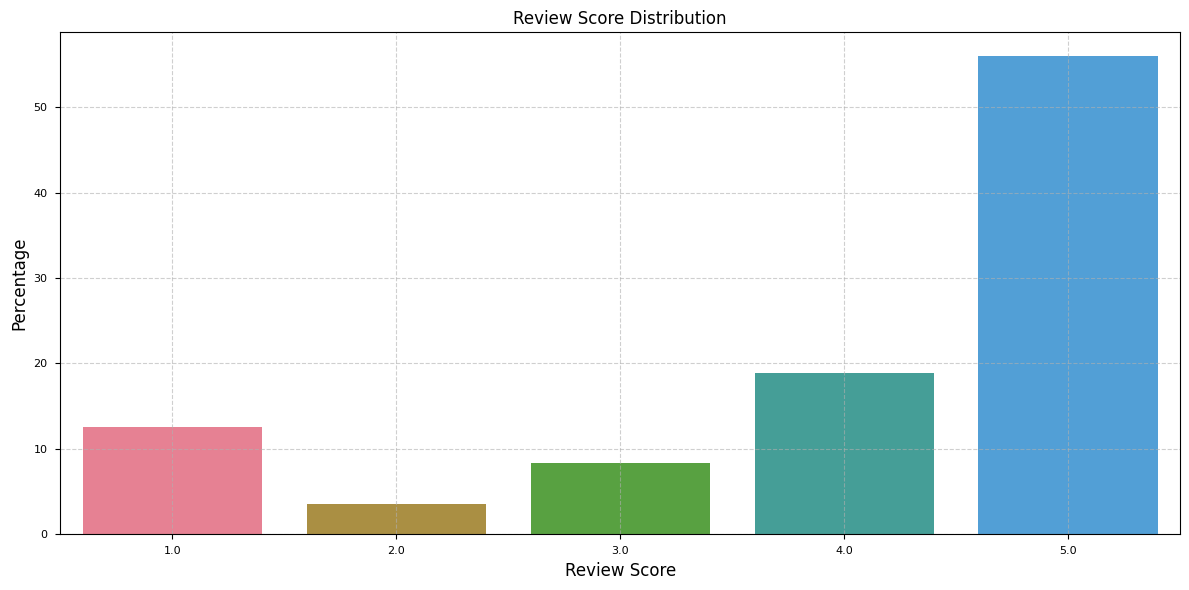

In [3]:
plot_count(df_analytics, column='review_score', title='Review Score Distribution', xlabel='Review Score', save_path='review_score_distribution.png')

In [4]:
for x in range(2,6):

    filt = df_analytics['review_score'] >= x
    df_analytics_filtered = df_analytics[filt]
    df_analytics_filtered['review_score'].count()
    df_analytics['review_score'].count()
    print(f'{df_analytics_filtered['review_score'].count() / df_analytics['review_score'].count() * 100: .2f}')

 87.34
 83.86
 75.47
 56.48


### Insight: Customer Experience is Polarized

The analysis of review scores reveals a J-shaped distribution, indicating a polarized customer experience.

* **Overwhelmingly Positive:** The vast majority of customers are satisfied. As calculated, over 75% of all reviews are positive (scores 4 and 5).
* **Peak Satisfaction:** A significant majority, approximately 57% of customers, give the highest possible score (5), indicating a successful experience.
* **A Significant Point of Failure:** Despite the positive trend, there is a substantial cluster of very dissatisfied customers. Around 13% of all reviews are the lowest possible score (1).

This suggests that while the platform generally delivers a high-quality experience, there is a recurring type of problem that leads to significant customer frustration. Future analysis should focus on identifying the drivers of these 1-star reviews.

### 4.2. Geographic Distribution of Orders

Next, let's investigate where the orders are coming from. Understanding the geographic distribution is crucial for logistics planning, marketing campaigns, and identifying key markets. We will start by visualizing the number of orders per state.

In [5]:
geo_distribution = df_analytics.groupby('customer_state')
geo_distribution = geo_distribution['order_id'].nunique()
geo_distribution = geo_distribution.sort_values(ascending=False).head(15)
geo_distribution


customer_state
SP    41375
RJ    12762
MG    11544
RS     5432
PR     4998
SC     3612
BA     3358
DF     2125
ES     2025
GO     2007
PE     1648
CE     1327
PA      970
MT      903
MA      740
Name: order_id, dtype: int64

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/geo_distribution_orders.png


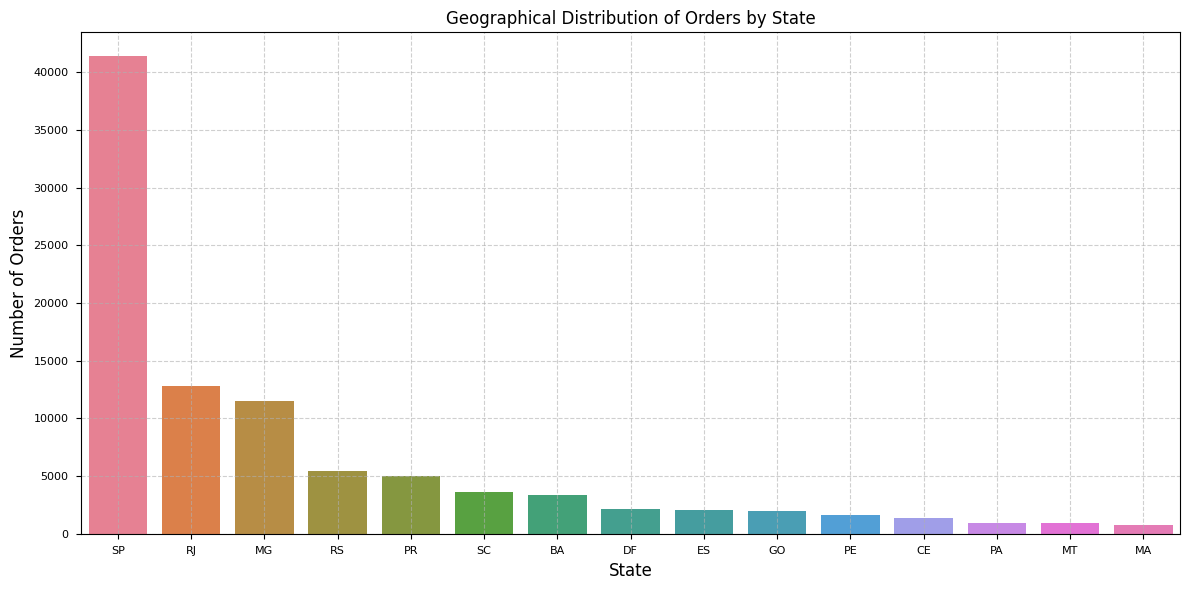

In [6]:
plot_bar(x=geo_distribution.index, y=geo_distribution.values, title='Geographical Distribution of Orders by State', xlabel='State', ylabel='Number of Orders', save_path='geo_distribution_orders.png')

In [7]:
# We can evaluate the percentage distribution of orders by state
print((geo_distribution.values/geo_distribution.values.sum())*100)

[43.63254804 13.45833421 12.17387636  5.72838673  5.27070635  3.8090819
  3.54122287  2.24094658  2.13549027  2.11650813  1.73791998  1.39940523
  1.0229262   0.95227047  0.78037669]


### Insight: Sales are Heavily Concentrated in the Southeast Region

The geographical analysis reveals a significant concentration of orders in a few key states, highlighting the importance of the Southeast region to the business.

* **Dominance of São Paulo (SP):** The state of São Paulo is the undisputed primary market, accounting for over 43% of all orders among the top 15 states. This single state generates more than three times the order volume of the next largest state.
* **Southeastern Powerhouse:** The Southeast region (SP, RJ, MG) is the core of the business, representing approximately 70% of the total order volume.
* **Secondary Markets:** The Southern region (RS, PR, SC) emerges as the second most important market, followed by key states in the Northeast and Central-West.
* **Business Implication:** This heavy concentration suggests that while logistical operations in the Southeast are likely mature, there is a significant opportunity for growth in other regions. Further analysis should investigate if factors like shipping costs or delivery times are barriers to entry in less represented states.

### 4.3. Sales Seasonality Analysis

Understanding temporal patterns is key for inventory management and marketing strategies. In this section, we'll analyze the number of orders over time to identify any seasonal trends or significant periods of sales growth. We will begin by plotting the number of orders per month.

In [8]:
df_analytics['Orders by Month'] = df_analytics['order_purchase_timestamp'].dt.to_period('M')
df_month = df_analytics.groupby('Orders by Month')
df_month = df_month['order_id'].nunique()
df_month = df_month.sort_index(ascending=True)
df_month

Orders by Month
2016-09       3
2016-10     308
2016-12       1
2017-01     789
2017-02    1733
2017-03    2641
2017-04    2391
2017-05    3660
2017-06    3217
2017-07    3969
2017-08    4293
2017-09    4243
2017-10    4568
2017-11    7451
2017-12    5624
2018-01    7220
2018-02    6694
2018-03    7188
2018-04    6934
2018-05    6853
2018-06    6160
2018-07    6273
2018-08    6452
2018-09       1
Freq: M, Name: order_id, dtype: int64

Line plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/orders_by_month.png


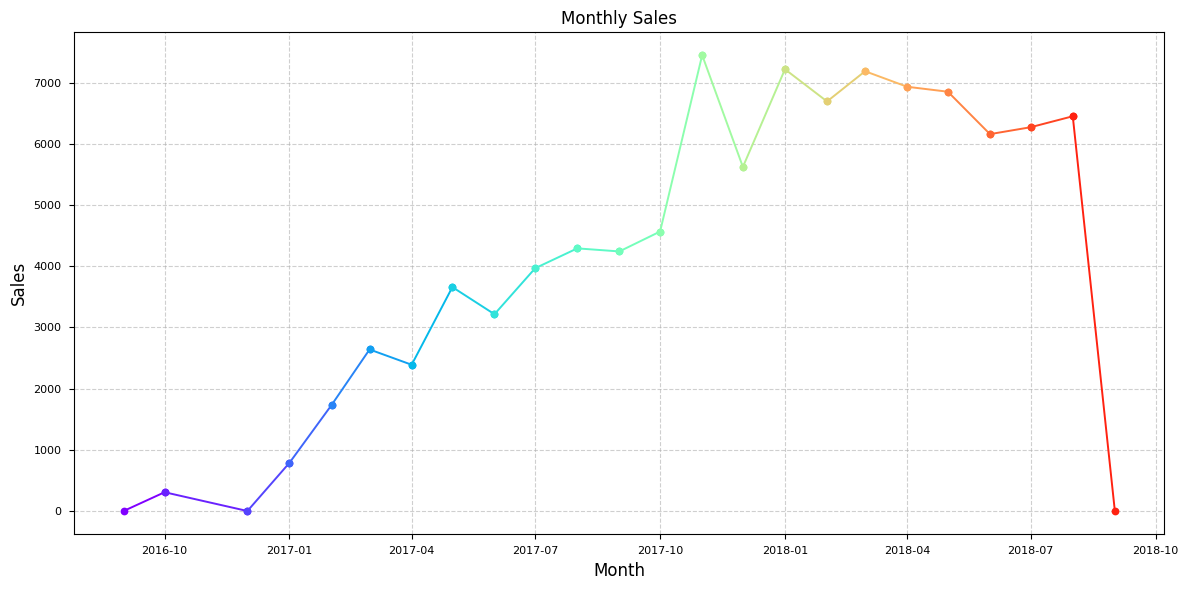

In [9]:
plot_line(data=df_month, title='Monthly Sales', xlabel='Month', ylabel='Sales', save_path='orders_by_month.png')

### Insight: Strong Sales Growth and Clear End-of-Year Seasonality

The analysis of orders over time reveals two major trends: overall business growth and a distinct seasonal pattern.

* **Business Growth:** There is a clear positive trend in order volume from the beginning of 2017 through mid-2018, indicating a period of significant business expansion. The number of orders in July 2018, for instance, is substantially higher than in July 2017.
* **Q4 Peak Seasonality:** A consistent and strong seasonal peak occurs in the fourth quarter (Q4), particularly in November. This spike is directly attributable to major retail events like Black Friday and the Christmas holiday season, which are the most critical sales periods for the business.
* **Data Anomalies:** The data points for late 2016 and late 2018 are significantly lower than the surrounding months. This is likely due to an incomplete data capture for those periods and should not be interpreted as a business trend.

**Business Implication:** The company's sales are heavily dependent on the Q4 peak. Marketing efforts, inventory management, and logistics must be exceptionally well-prepared for this period. The overall growth trend also suggests that the company was successfully scaling its operations during this timeframe.

### 4.4. Impact of Delivery Performance on Customer Satisfaction

One of the most critical hypotheses in e-commerce is that delivery performance directly impacts customer satisfaction. In this section, we will investigate the relationship between the actual shipping time, delivery delays, and the final review scores given by the customers.

In [10]:
df_analytics.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_value,shipping_time_days,total_delivery_time,shipping_delay_days,Orders by Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,118.70,13,13,0,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,159.90,9,9,0,2018-08


In [11]:
dev_performance = df_analytics.groupby('review_score')['shipping_time_days'].mean()
dev_performance2 = df_analytics.groupby('review_score')['shipping_delay_days'].mean()

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/avg_shipping_time_by_review_score.png


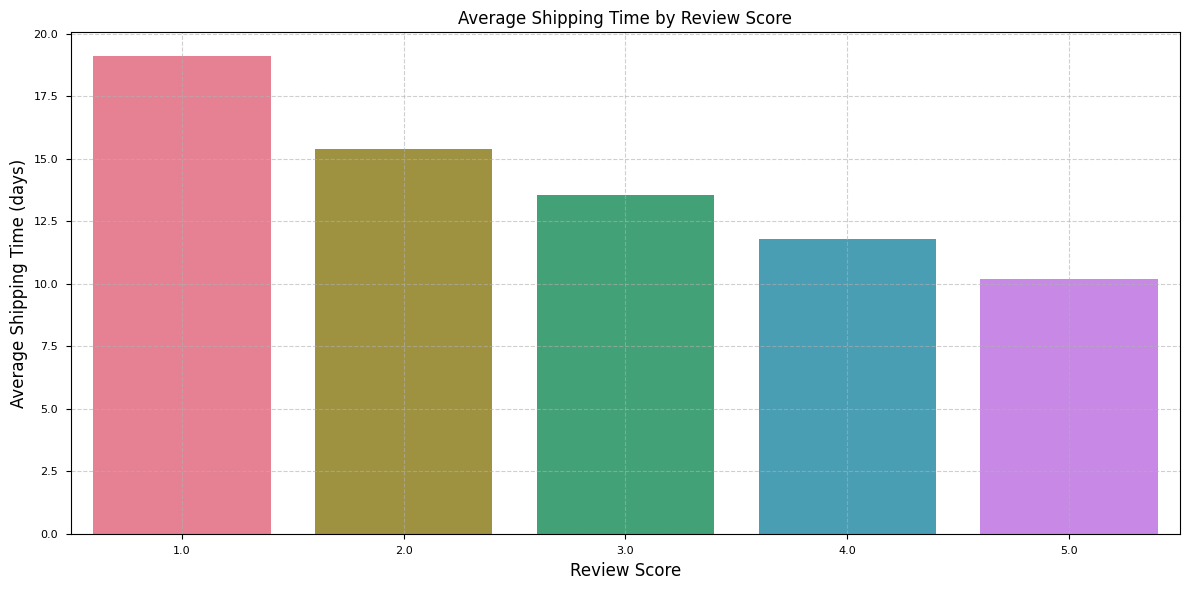

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/avg_shipping_delay_by_review_score.png


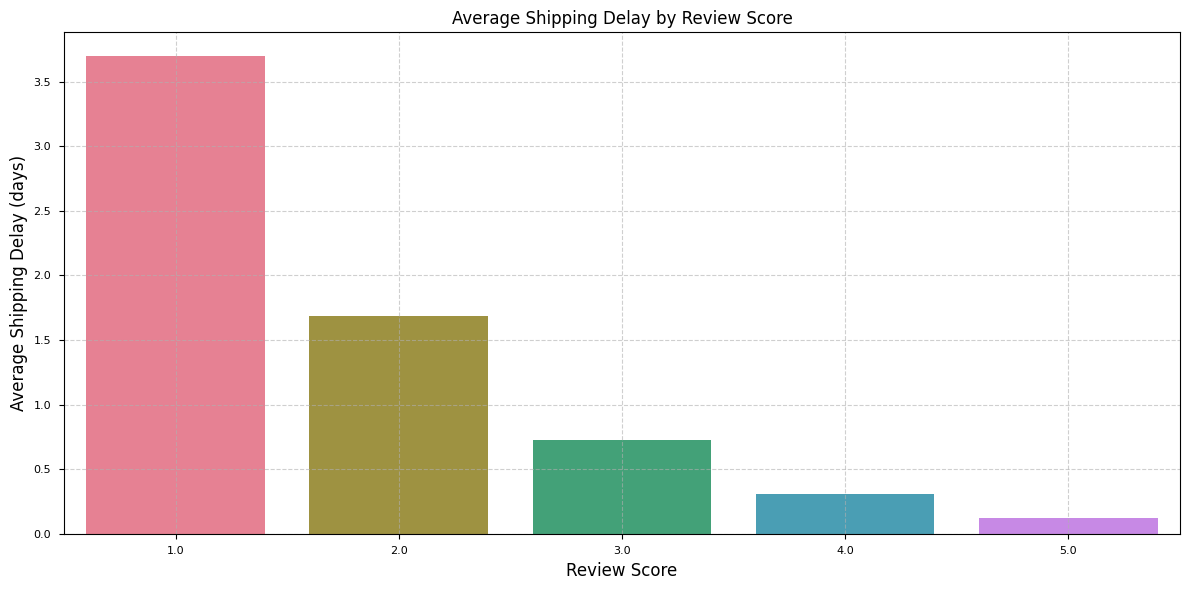

In [12]:
plot_bar(dev_performance.index, dev_performance.values, title='Average Shipping Time by Review Score', xlabel='Review Score', ylabel='Average Shipping Time (days)', save_path='avg_shipping_time_by_review_score.png')
plot_bar(dev_performance2.index, dev_performance2.values, title='Average Shipping Delay by Review Score', xlabel='Review Score', ylabel='Average Shipping Delay (days)', save_path='avg_shipping_delay_by_review_score.png')

In [13]:
plot_dev_performance = df_analytics.dropna(subset=['shipping_time_days', 'shipping_delay_days', 'review_score'])
plot_dev_performance['Delayed'] = plot_dev_performance['shipping_delay_days'].apply(lambda x: "Yes" if x > 0 else "No")


/tmp/ipykernel_791635/3220770647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_dev_performance['Delayed'] = plot_dev_performance['shipping_delay_days'].apply(lambda x: "Yes" if x > 0 else "No")


Box plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/box_shipping_time_by_review_score.png


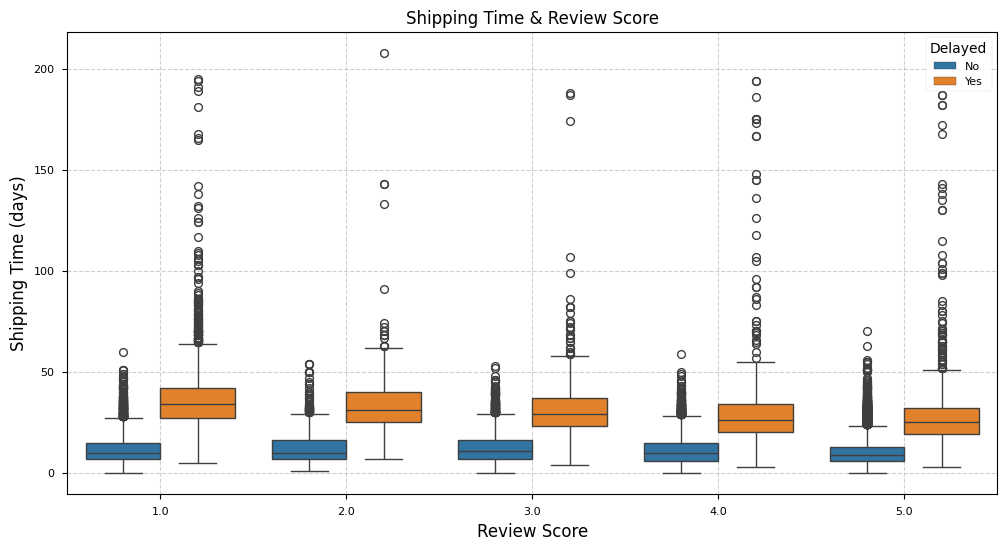

In [14]:
plot_box(df=plot_dev_performance, x='review_score', y='shipping_time_days', title='Shipping Time & Review Score', xlabel='Review Score', ylabel='Shipping Time (days)', save_path='box_shipping_time_by_review_score.png', hue='Delayed')

In [15]:
plot_dev_performance.groupby(['Delayed', 'review_score'])[['shipping_time_days']].describe()

shipping_time_days                                   \
                                  count       mean        std  min   25%   
Delayed review_score                                                       
No      1.0                      9113.0  11.743114   7.034841  0.0   7.0   
        2.0                      3263.0   11.90285   7.374168  1.0   7.0   
        3.0                      8870.0  11.984667   6.988965  0.0   7.0   
        4.0                     21413.0  11.136179   6.405738  0.0   6.0   
        5.0                     64834.0   9.872675   5.919378  0.0   6.0   
Yes     1.0                      4008.0  35.827345  15.360687  5.0  27.0   
        2.0                       636.0  33.231132  15.356602  7.0  25.0   
        3.0                       780.0  31.380769  16.238115  4.0  23.0   
        4.0                       737.0   30.43555  23.937225  3.0  20.0   
        5.0                      1207.0  27.960232  18.991272  3.0  19.0   

                                         
                       50%   75%    max  
Delayed review_score                     
No      1.0           10.0  15.0   60.0  
        2.0           10.0  16.0   54.0  
        3.0           11.0  16.0   53.0  
        4.0           10.0  15.0   59.0  
        5.0            9.0  13.0   70.0  
Yes     1.0           34.0  42.0  195.0  
        2.0           31.0  40.0  208.0  
        3.0           29.0  37.0  188.0  
        4.0           26.0  34.0  194.0  
        5.0           25.0  32.0  187.0

In [ ]:
delay_counts = plot_dev_performance.groupby(['review_score', 'Delayed'])['order_id'].count()
delay_percentage = delay_counts.groupby(level=0).apply(lambda x: 100 * x / x.sum())

delay_percentage_df = delay_percentage.unstack(level='Delayed').fillna(0)


# --- 2. Plotagem (agora usando sua nova função) ---

plot_stacked_bar(data=delay_percentage_df,title='Proportion of Delayed Orders by Review Score',xlabel='Review Score',ylabel='Percentage of Orders (%)',save_path='delay_proportion_by_review_score.png')

### Insight: Delivery Performance is a Key Driver of Customer Satisfaction

The analysis confirms a strong negative correlation between shipping time/delays and customer review scores. Poor delivery performance is a primary cause of customer dissatisfaction.

* **Longer Shipping Times Lead to Lower Scores:** As shown in the bar chart of averages, there is a clear, inverse relationship: the average shipping time for 1-star reviews is nearly double that of 5-star reviews (approx. 19 days vs. 10 days).
* **Delays are Critical:** The impact is even more pronounced for delayed orders. The `describe()` table and box plot reveal a stark difference: the average shipping time for a 1-star review on a delayed order is **35.8 days**, compared to just **9.8 days** for a 5-star review on an on-time order.
* **The Power of On-Time Delivery:** Even among delayed orders, customers who receive their products faster tend to give better scores. However, the mere fact that an order is delayed significantly increases the likelihood of a low score.

**Business Implication:** Reducing shipping time and, most importantly, meeting the estimated delivery date are the most impactful levers the business can pull to improve its overall customer satisfaction ratings. Investment in logistics, carrier management, and accurate delivery estimates is critical for customer retention.